https://computer-science-student.tistory.com/292

In [112]:
import pandas as pd

df=pd.read_csv('./PortfolioData/DATA/요기요.csv',encoding='cp949')
df.head()

,크롤링시간,지역,가게이름,아이디,몇시간전,주문내용,댓글,맛,양,배달,사장,사진주소
0,2021년 10월 26일,와동,KFC-안산중앙점,he**님,2021년 10월 26일,"타워박스/1(사이드변경(롱치즈스틱교환),음료변경(콜라))",kfc 역시 맛있음ㅋㅋ,5,5,5,----사장님 답글이 없어요 ----,이미지는 없어요
1,2021년 10월 25일,와동,KFC-안산중앙점,yh**님,2021년 10월 25일,"켄터키업그레이비박스/1(사이드변경(케이준후라이),음료변경(콜라)),핫통삼겹베이컨버거...",맛있게 잘먹었습니다,5,5,5,----사장님 답글이 없어요 ----,https://rev-static.yogiyo.co.kr/c6421e47e4283a...
2,2021년 10월 25일,와동,KFC-안산중앙점,48**님,2021년 10월 25일,"켄터키바비큐통다리구이 2조각/1,고추콰삭블랙라벨 1조각/1,핫크리스피치킨 3조각/1",조각이 같은 가격인데 작은 조각이 와서 좀 당황했지만 만족,5,4,5,----사장님 답글이 없어요 ----,https://rev-static.yogiyo.co.kr/1ce36971b18045...
3,2021년 10월 25일,와동,KFC-안산중앙점,sp**님,2021년 10월 25일,"핫통삼겹베이컨박스/1(치킨변경(오리지널치킨교환),사이드변경(케이준후라이),음료변경(...",남친한테 뺏김 ㅠㅠㅠ,5,5,5,----사장님 답글이 없어요 ----,이미지는 없어요
4,2021년 10월 25일,와동,KFC-안산중앙점,wn**님,2021년 10월 25일,"켄터키바비큐통다리구이 1조각/1,켄터키치킨립 3조각/1,블랙라벨폴인치즈박스/1(치킨...",믿고 먹는 kfc~ 통다리구이 처음먹어보는데 커서 좋았습니다~ 굿굿,5,5,5,----사장님 답글이 없어요 ----,https://rev-static.yogiyo.co.kr/51d9ada56cdc0d...


In [113]:
import datetime as dt
# 크롤링시간 맛 양 배달만 추출
df1=df[['크롤링시간','맛','양','배달']]

In [114]:
df1.head()

,크롤링시간,맛,양,배달
0,2021년 10월 26일,5,5,5
1,2021년 10월 25일,5,5,5
2,2021년 10월 25일,5,4,5
3,2021년 10월 25일,5,5,5
4,2021년 10월 25일,5,5,5


In [115]:
# 데이터 프레임화
df1=pd.DataFrame(df1)


In [116]:
# 컬럼안의 한글제거
df1['크롤링시간']=df['크롤링시간'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+',repl=r'',regex=True)


In [117]:
# 제거된 한글대신 구분기호

In [118]:
# 없어도 무방
df1['크롤링시간']=df1['크롤링시간'].str.replace(" ","/")

In [119]:
df1

,크롤링시간,맛,양,배달
0,2021/10/26,5,5,5
1,2021/10/25,5,5,5
2,2021/10/25,5,4,5
3,2021/10/25,5,5,5
4,2021/10/25,5,5,5
...,...,...,...,...
9879,2021/08/31,5,5,5
9880,2021/08/30,5,5,5
9881,2021/08/29,5,5,5
9882,2021/08/25,5,5,5


In [120]:
df1['크롤링시간']=pd.to_datetime(df1['크롤링시간'],errors='coerce')
# 범위 벗어난 날가 강제적용

In [121]:
df1

,크롤링시간,맛,양,배달
0,2021-10-26,5,5,5
1,2021-10-25,5,5,5
2,2021-10-25,5,4,5
3,2021-10-25,5,5,5
4,2021-10-25,5,5,5
...,...,...,...,...
9879,2021-08-31,5,5,5
9880,2021-08-30,5,5,5
9881,2021-08-29,5,5,5
9882,2021-08-25,5,5,5


df[column name].dt.date         # YYYY-MM-DD(문자)<br>
df[column nam].dt.year         # 연(4자리숫자)<br>
df[column nam].dt.month        # 월(숫자)<br>
df[column nam].dt.month_name() # 월(문자)<br>

df[column nam].dt.day          # 일(숫자)<br>
df[column nam].dt.time         # HH:MM:SS(문자)<br>
df[column nam].dt.hour         # 시(숫자)<br>
df[column nam].dt.minute       # 분(숫자)<br>
df[column nam].dt.second       # 초(숫자)<br>

In [122]:
df1['요일']=df1['크롤링시간'].dt.weekday

In [123]:
df1['일']=df1['크롤링시간'].dt.day

In [124]:
df1['월']=df1['크롤링시간'].dt.month

In [125]:
# 요일이 소수점으로 나오나 상관없음 
df1

,크롤링시간,맛,양,배달,요일,일,월
0,2021-10-26,5,5,5,1.0,26.0,10.0
1,2021-10-25,5,5,5,0.0,25.0,10.0
2,2021-10-25,5,4,5,0.0,25.0,10.0
3,2021-10-25,5,5,5,0.0,25.0,10.0
4,2021-10-25,5,5,5,0.0,25.0,10.0
...,...,...,...,...,...,...,...
9879,2021-08-31,5,5,5,1.0,31.0,8.0
9880,2021-08-30,5,5,5,0.0,30.0,8.0
9881,2021-08-29,5,5,5,6.0,29.0,8.0
9882,2021-08-25,5,5,5,2.0,25.0,8.0


In [126]:
# 매핑으로 바꿔줌
df1['요일'] = df1['요일'].map({0.0:'월',1.0:'화',2.0:'수',3.0:'목',4.0:'금',5.0:'토',6.0:'일'},na_action=None)

In [147]:
df1['종합점수'] = df1['맛']+df1['양']+df1['배달']

In [143]:
px.pie(df1,values='일',names='일')

In [133]:
df1['크롤링시간'].value_counts()

2021-10-07    82
2021-10-08    78
2021-09-05    76
2021-10-11    75
2021-10-10    72
              ..
2019-12-05     1
2020-06-02     1
2019-10-16     1
2019-10-31     1
2046-01-01     1
Name: 크롤링시간, Length: 790, dtype: int64

In [91]:
df1.loc[2021-10-07]

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-91-7636c3068322>, line 1)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px







5    8555
4     794
3     282
1     162
2      91
Name: 맛, dtype: int64
5    8673
4     749
3     277
1     127
2      58
Name: 양, dtype: int64


In [168]:
df1

,크롤링시간,맛,양,배달,요일,일,월,종합점수
0,2021-10-26,5,5,5,화,26.0,10.0,15
1,2021-10-25,5,5,5,월,25.0,10.0,15
2,2021-10-25,5,4,5,월,25.0,10.0,14
3,2021-10-25,5,5,5,월,25.0,10.0,15
4,2021-10-25,5,5,5,월,25.0,10.0,15
...,...,...,...,...,...,...,...,...
9879,2021-08-31,5,5,5,화,31.0,8.0,15
9880,2021-08-30,5,5,5,월,30.0,8.0,15
9881,2021-08-29,5,5,5,일,29.0,8.0,15
9882,2021-08-25,5,5,5,수,25.0,8.0,15


C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 47579 missing from current font.

C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50577 missing from current font.

C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 48176 missing from current font.

C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 45804 missing from current font.

C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51068 missing from current font.

C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 50900 missing from current font.

C:\Users\504\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 51333 missing from current font.

C:\Users\504\anaconda3\lib\site-pa

<AxesSubplot:>

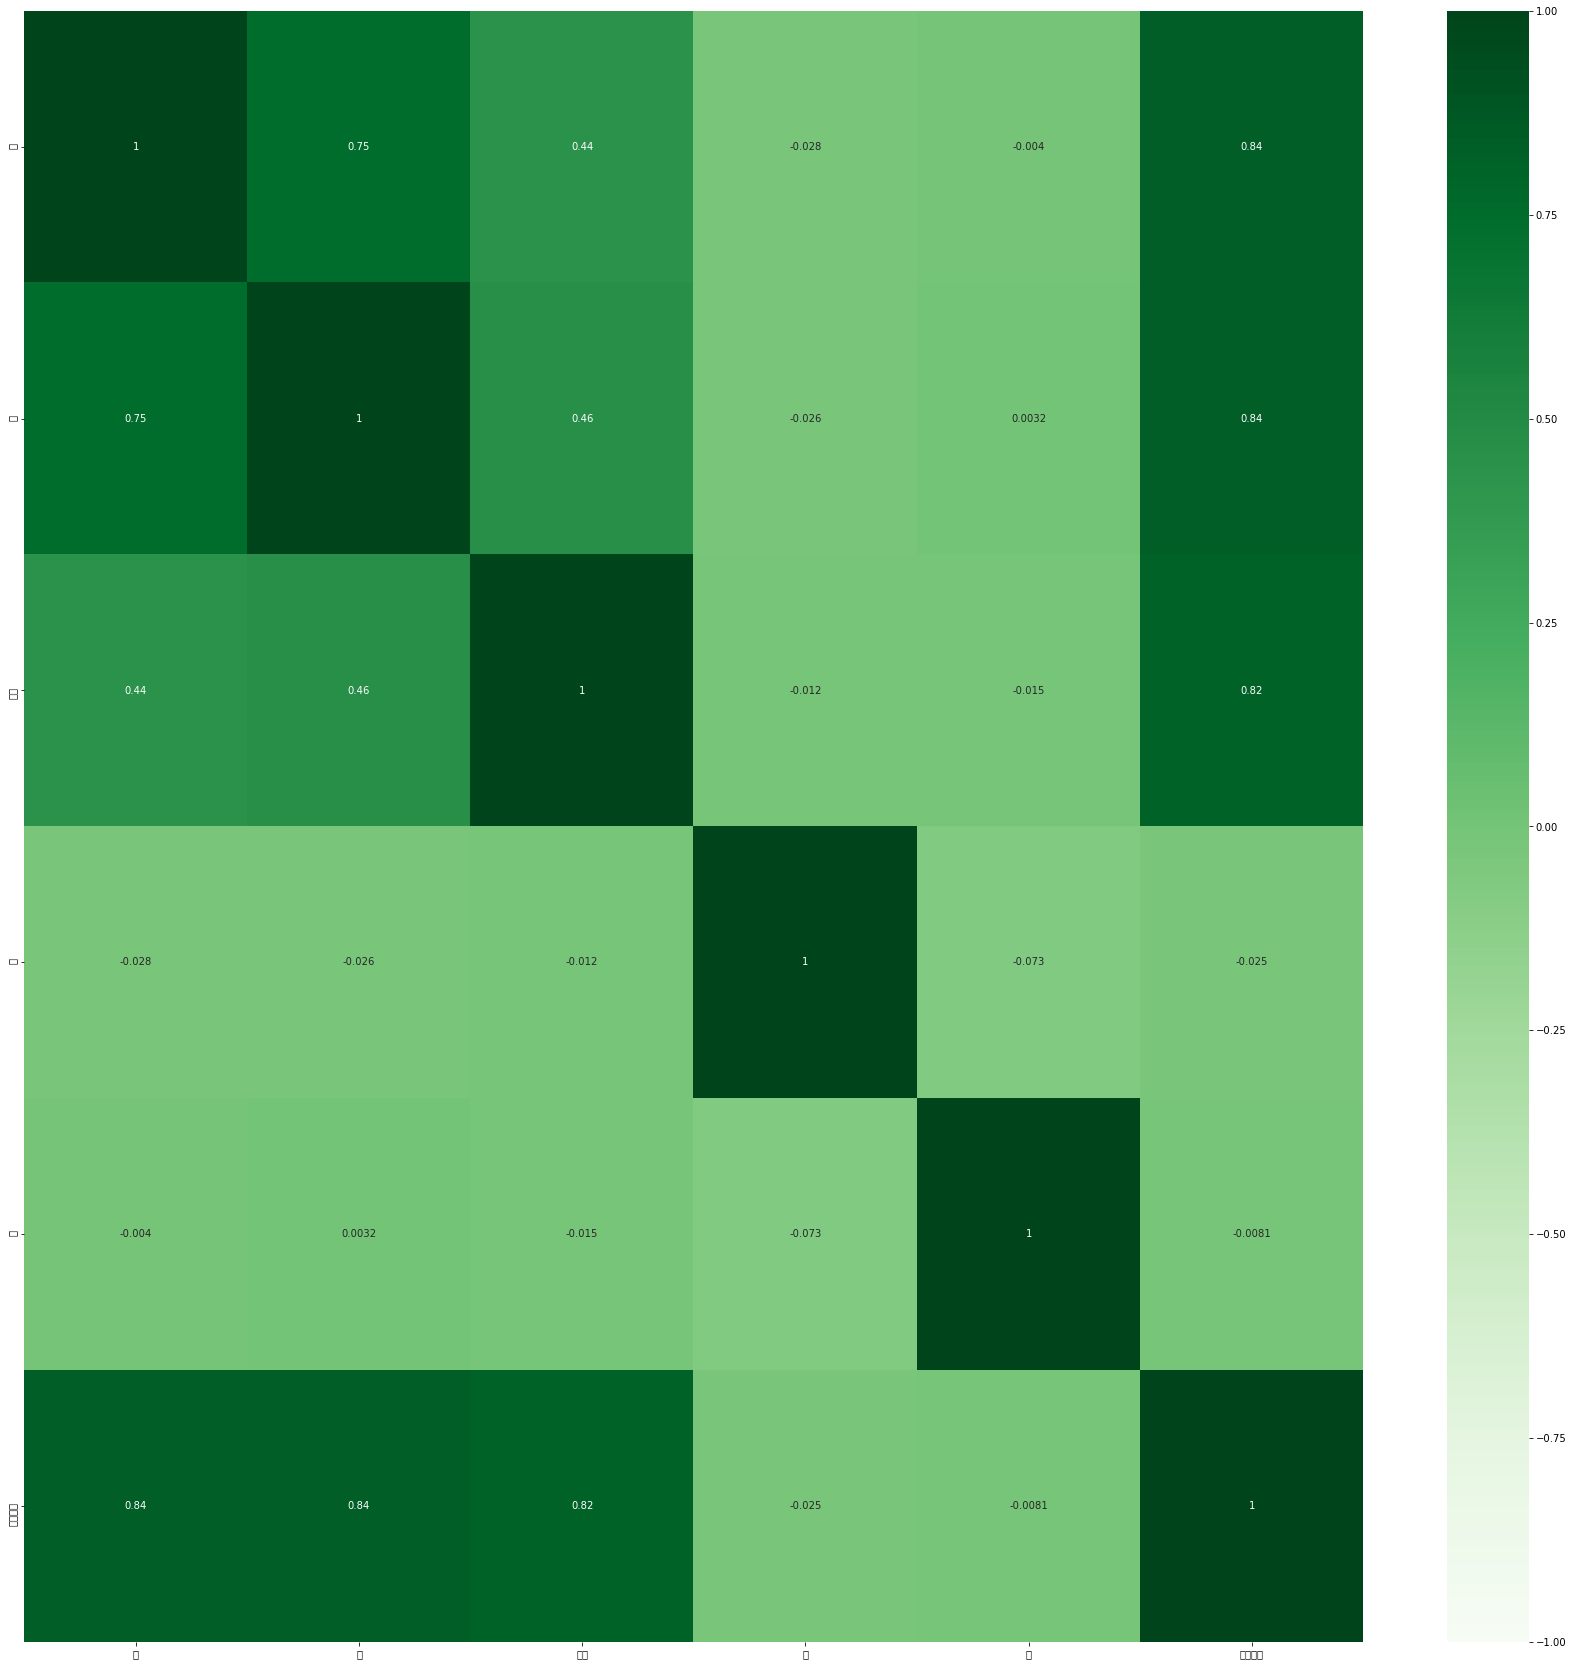

In [169]:
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (30,30)
sb.heatmap(df1.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [170]:
# 시각화용
import matplotlib.pyplot as plt 
import seaborn as sns 
# jupyter notebook 내 그래프를 바로 그리기 위한 설정 
%matplotlib inline  
#속도빠르게하기위한건데 고려해볼필요있음
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지) 
plt.rcParams['axes.unicode_minus'] = False
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib.font_manager as fm 
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷
# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

In [177]:
# 상관분석
df1.corr(method='pearson')

,맛,양,배달,일,월,종합점수
맛,1.000000,0.746431,0.439787,-0.028041,-0.003990,0.838305
양,0.746431,1.000000,0.464243,-0.026462,0.003233,0.842472
배달,0.439787,0.464243,1.000000,-0.012251,-0.015470,0.817603
일,-0.028041,-0.026462,-0.012251,1.000000,-0.073404,-0.025332
월,-0.003990,0.003233,-0.015470,-0.073404,1.000000,-0.008053
종합점수,0.838305,0.842472,0.817603,-0.025332,-0.008053,1.000000
